1. Scikit-learn을 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [1]:
import sklearn as sk

2. Pandas를 별칭(alias) pd로 임포트하는 코드를 작성하고 실행하세요.


In [2]:
import pandas as pd

3. Pandas 함수로 데이터 파일을 읽어 dataframe변수(변수명 df)에 할당하는 코드를 작성하세요.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/14 AICE/미니프로젝트 5차_2일차_실습파일/nav_data.csv', encoding='cp949')

4. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다. Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.

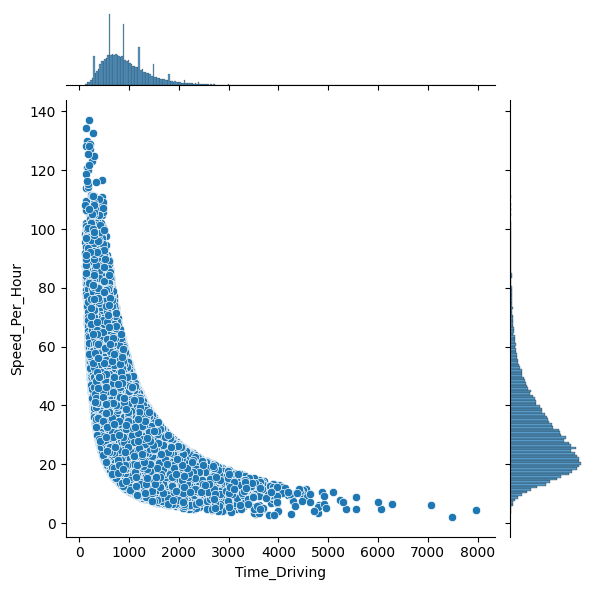

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

5. 데이터 간 상관계수를 구하여 heatmap 그래프로 시각화 해보세요.(annotation 포함)

<ipython-input-5-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

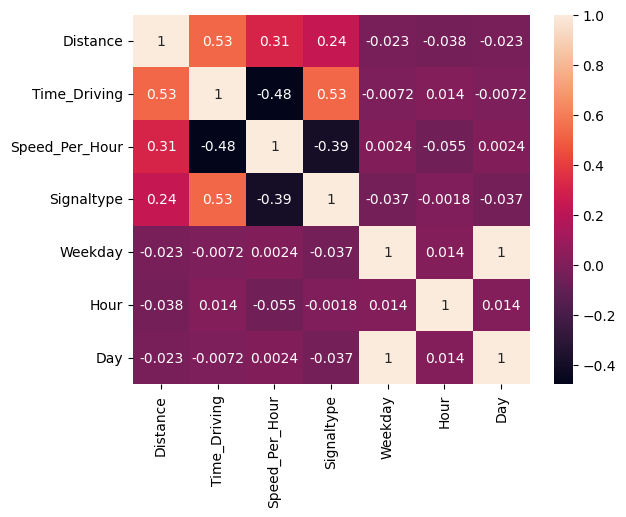

In [5]:
sns.heatmap(df.corr(), annot=True)

6. 불필요 데이터를 삭제 처리하세요.('Time_Departure' 컬럼을 삭제하세요. 처리 결과를 df_temp 데이터프레임에 저장하세요)

In [6]:
df_temp = df.drop(['Time_Departure', 'Time_Arrival'], axis=1)

7. Sckit-learn의 encoder를 사용하여 범주형 데이터를 수치형 데이터로 변환하세요.(대상 컬럼:주소 컬럼, fit_transform 활용)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_temp['Address1'] = encoder.fit_transform(df_temp['Address1'])
df_temp['Address2'] = encoder.fit_transform(df_temp['Address2'])

8. 원-핫 인코딩으로 컬럼 데이터를 1과 0의 이진형 벡터로 변환하세요.(대상 컬럼 : weekday, hour, day, address1, address2, get_dummies 활용, drop_first는 'True' 파라미터 추가)

In [8]:
df_temp = pd.get_dummies(df_temp, columns=['Weekday', 'Hour', 'Day', 'Address1', 'Address2'], drop_first=True)

9. 훈련과 검증 각각에 사용할 데이터셋 분리하세요.(y:Time_Driving, Scikit-learn의 train_test_split 함수 활용하여 7:3으로 분리)

In [9]:
from sklearn.model_selection import train_test_split

x = df_temp.drop('Time_Driving', axis=1)
y = df_temp.loc[:, 'Time_Driving']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

10. StandardScaler를 사용하여 데이터 변수를 훈련데이터셋은 정규분포화(fit_transform), 검증데이터셋은 표준화(transform) 하세요.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

11. Time_Driving(실주행시간) 칼럼을 Label(y)로, 나머지 컬럼을 Feature(x)로 할당한 후, max_depth 5로 decision tree로 머신러닝 모델을 만들고 학습을 진행하세요.

In [11]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

12. 머신러닝 모델에 대해 RMSE, R-squared 값 출력, scatter plot을 이용하여 x축에 실제 y값 및 y축에 예측값 시각화

RMSE : 157.18956848087262
R-squared : 0.9076940752795323


<Axes: xlabel='Time_Driving'>

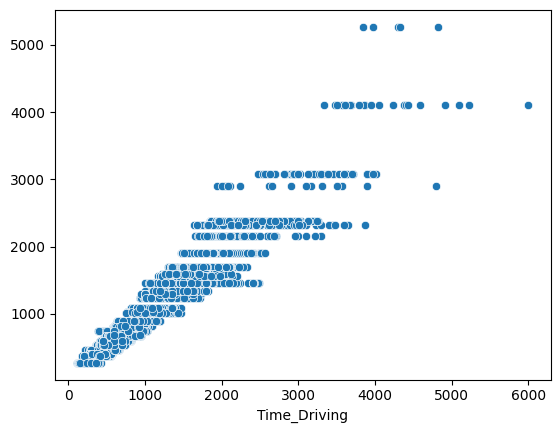

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_val)

mae = mean_squared_error(y_val, y_pred)

print(f'RMSE : {mae ** 0.5}')
print(f'R-squared : {r2_score(y_val, y_pred)}')

sns.scatterplot(x=y_val, y=y_pred)

13. 딥러닝 모델을 만드세요.(EarlyStopping 콜백 적용, ModelCheckpoing 콜백 적용하여 validation performance가 좋은 모델을 best_model.h5 파일로 저장)

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

keras.backend.clear_session()

model = Sequential()

model.add(Input(shape=(117, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], validation_data=(x_val, y_val))

Epoch 1/10
1215/1215 [==============================] - 4s 2ms/step - loss: 709088.0000 - val_loss: 142947.0625
Epoch 2/10
1215/1215 [==============================] - 3s 2ms/step - loss: 79116.3281 - val_loss: 58693.6641
Epoch 3/10
1215/1215 [==============================] - 4s 3ms/step - loss: 51610.4766 - val_loss: 44134.6641
Epoch 4/10
1215/1215 [==============================] - 3s 3ms/step - loss: 40597.3672 - val_loss: 35488.1484
Epoch 5/10
1215/1215 [==============================] - 3s 2ms/step - loss: 33787.3906 - val_loss: 29898.9180
Epoch 6/10
1215/1215 [==============================] - 3s 2ms/step - loss: 29053.0801 - val_loss: 25735.3125
Epoch 7/10
1215/1215 [==============================] - 3s 2ms/step - loss: 25494.9297 - val_loss: 22711.2598
Epoch 8/10
1215/1215 [==============================] - 4s 3ms/step - loss: 22873.9570 - val_loss: 20501.3887
Epoch 9/10
1215/1215 [==============================] - 3s 2ms/step - loss: 20953.0410 - val_loss: 18802.5508
Epoch 10

14. 딥러닝 모델 훈련데이터셋의 mae와 검증데이터셋의 val_mae를 1개의 그래프에 표시하세요. (mae, val_mae 범례를 표시하고, 그래프의 타이틀은 Training mae로 표시, x축에는 Epochs라고 표시, y축에는 mae라고 표시)

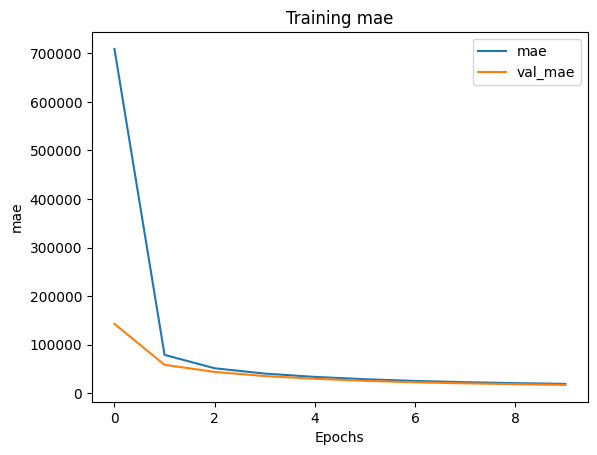

In [17]:
if not isinstance(history, dict):
    history = history.history
    
plt.plot(history['loss'])
plt.plot(history['val_loss'])

plt.title('Training mae')
plt.xlabel('Epochs')
plt.ylabel('mae')

plt.legend(['mae', 'val_mae'])
plt.show()